In [1]:
from params import *
from model_functions import *



2025-12-20 21:57:37.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
c:\Users\manik\anaconda3\envs\bike\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:

data=read_data()
print(data.head())
print(len(data))
data=clean(data)
print(data.head())
print(len(data))

# print(data.dtypes)


   Trip Id  Trip  Duration Start Station Id        Start Time  \
0  7334128             648             7003  01/01/2020 00:08   
1  7334129             419             7007  01/01/2020 00:10   
2  7334130             566             7113  01/01/2020 00:13   
3  7334131            1274             7333  01/01/2020 00:17   
4  7334132             906             7009  01/01/2020 00:19   

             Start Station Name End Station Id          End Time  \
0      Madison Ave / Bloor St W         7271.0  01/01/2020 00:19   
1         College St / Huron St         7163.0  01/01/2020 00:17   
2  Parliament St / Aberdeen Ave         7108.0  01/01/2020 00:22   
3       King St E / Victoria St         7311.0  01/01/2020 00:38   
4         King St E / Jarvis St         7004.0  01/01/2020 00:34   

                  End Station Name Bike Id      User Type  
0  Yonge St / Alexander St - SMART    3104  Annual Member  
1               Yonge St / Wood St    2126  Annual Member  
2           Front St

In [3]:
flattened_array = data.to_numpy().flatten()
# print(flattened_array)
ds = data.index.get_level_values(0)
station=data.index.get_level_values(1)
df_dict={'ds': ds,'station_id':station,'y':flattened_array}
df=pd.DataFrame(df_dict)


In [4]:
# print(data.index[])
# Reassign the index of the Series to only the first level's values


# print(data.index)

print(df)
chosen_df=df[df['station_id']=='7001']
print(chosen_df)

               ds station_id   y
0      2020-01-06       7000  88
1      2020-01-06       7001  45
2      2020-01-06       7002  92
3      2020-01-06       7003  36
4      2020-01-06       7004  47
...           ...        ...  ..
130561 2024-02-05       7916  21
130562 2024-02-05       7917  37
130563 2024-02-05       7922   7
130564 2024-02-05       7924  17
130565 2024-02-05       7925  36

[130566 rows x 3 columns]
               ds station_id    y
1      2020-01-06       7001   45
460    2020-01-13       7001   30
916    2020-01-20       7001   27
1371   2020-01-27       7001   45
1824   2020-02-03       7001   46
...           ...        ...  ...
126939 2024-01-08       7001  175
127682 2024-01-15       7001  174
128402 2024-01-22       7001  161
129123 2024-01-29       7001  222
129860 2024-02-05       7001   99

[212 rows x 3 columns]


In [5]:

model=Prophet(daily_seasonality=False,
              weekly_seasonality=True,
              yearly_seasonality=True)
model.add_country_holidays(country_name="Canada")
model.fit(chosen_df)

21:58:59 - cmdstanpy - INFO - Chain [1] start processing
21:58:59 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=12, freq='W-MON')
forecast = model.predict(future)
# fig1 = model.plot(forecast)
# fig2 = model.plot_components(forecast)


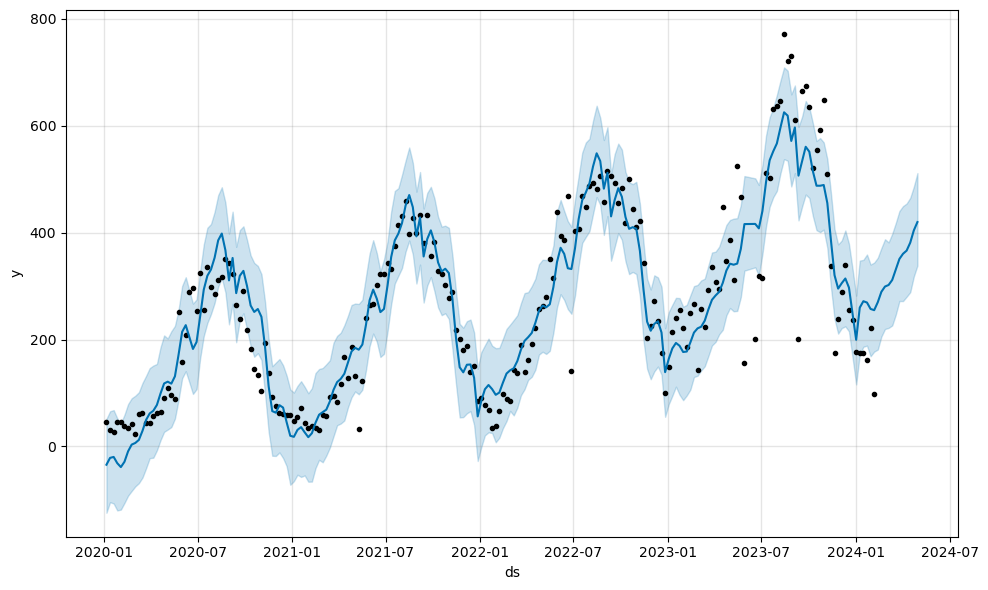

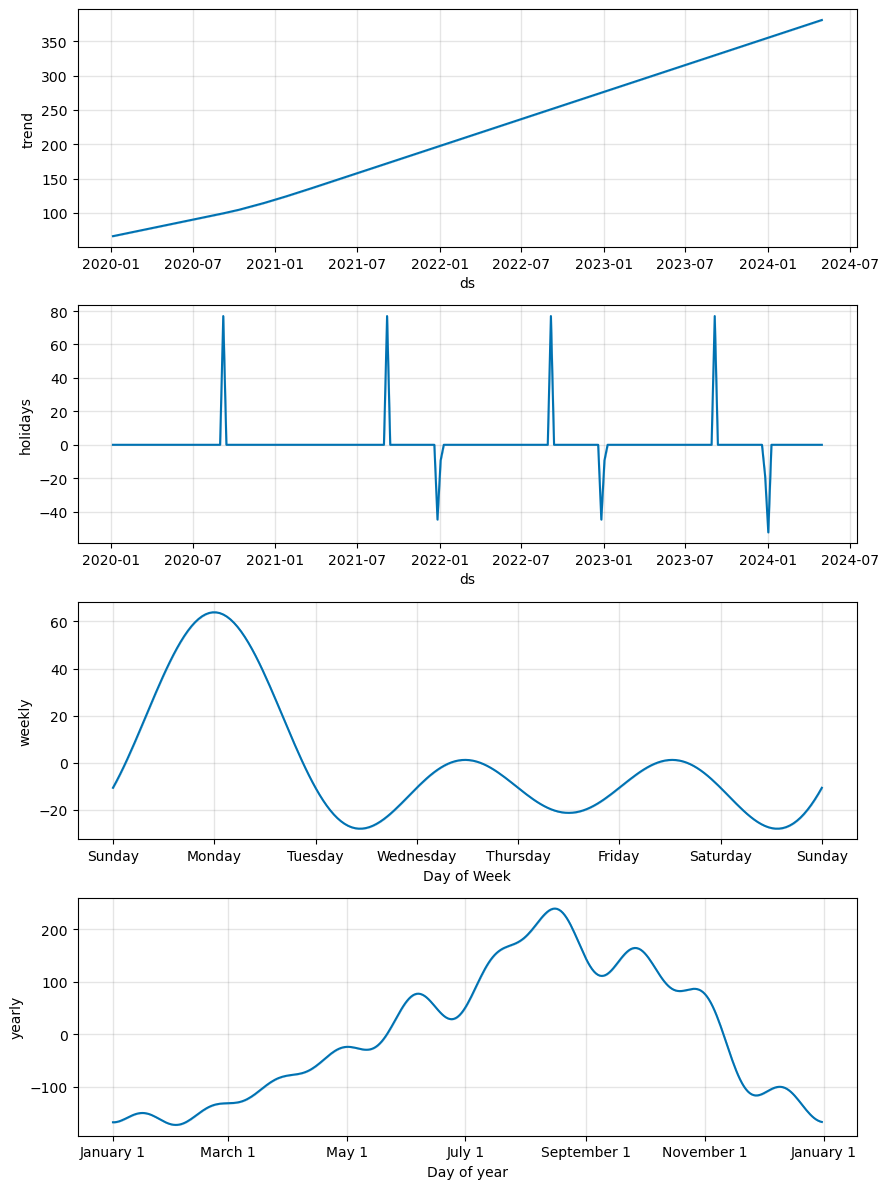

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

plt.show()


In [8]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds       yhat  yhat_lower  yhat_upper
0 2020-01-06 -34.119978 -124.079423   51.613272
1 2020-01-13 -21.347505 -104.280749   65.794059
2 2020-01-20 -19.578763 -106.702453   68.077671
3 2020-01-27 -31.249288 -119.718510   52.689503
4 2020-02-03 -38.586774 -118.119840   43.482575
